In [1]:
import numpy as np

In [2]:
cd ~/classes/DSC478/data

[Errno 2] No such file or directory: '/Users/appobs/classes/DSC478/data'
/Users/appobs/Desktop/hw/478/code & data


#### In this example, we consider the use of Numpy in handling a typical relational dataset (__[video_store.csv](../data/video_store.csv)__). Since some fields are not numeric, we cannot use "loadtxt" function to load the table. Instead we can use the more general function "genfromtxt" to load the data with dtype=None. This will create the 2d array with strings as entries. The numeric fields can later be converted into the appropriate data type.

In [3]:
vstable = np.genfromtxt("video_store.csv", delimiter=",", dtype=str)
print (vstable)

[['ID' 'Gender' 'Income' 'Age' 'Rentals' 'AvgPerVisit' 'Genre']
 ['1' 'M' '45000 ' '25' '27' '2.5' 'Action']
 ['2' 'F' '54000 ' '33' '12' '3.4' 'Drama']
 ['3' 'F' '32000 ' '20' '42' '1.6' 'Comedy']
 ['4' 'F' '59000 ' '70' '16' '4.2' 'Drama']
 ['5' 'M' '37000 ' '35' '25' '3.2' 'Action']
 ['6' 'M' '18000 ' '20' '33' '1.7' 'Action']
 ['7' 'F' '29000 ' '45' '19' '3.8' 'Drama']
 ['8' 'M' '74000 ' '25' '31' '2.4' 'Action']
 ['9' 'M' '38000 ' '21' '18' '2.1' 'Comedy']
 ['10' 'F' '65000 ' '40' '21' '3.3' 'Drama']
 ['11' 'F' '41000 ' '22' '48' '2.3' 'Drama']
 ['12' 'F' '26000 ' '22' '29' '2.9' 'Action']
 ['13' 'M' '83000 ' '46' '14' '3.6' 'Comedy']
 ['14' 'M' '45000 ' '36' '24' '2.7' 'Drama']
 ['15' 'M' '68000 ' '30' '36' '2.7' 'Comedy']
 ['16' 'M' '17000 ' '19' '26' '2.2' 'Action']
 ['17' 'M' '36000 ' '35' '28' '3.5' 'Drama']
 ['18' 'F' '6000 ' '16' '39' '1.8' 'Action']
 ['19' 'F' '24000 ' '25' '41' '3.1' 'Comedy']
 ['20' 'M' '12000 ' '16' '23' '2.2' 'Action']
 ['21' 'F' '47000 ' '52' '11' '3.

In [4]:
labels = vstable[0]
print (labels)

['ID' 'Gender' 'Income' 'Age' 'Rentals' 'AvgPerVisit' 'Genre']


In [5]:
vstable = vstable[1:]
vstable[0:5]

array([['1', 'M', '45000 ', '25', '27', '2.5', 'Action'],
       ['2', 'F', '54000 ', '33', '12', '3.4', 'Drama'],
       ['3', 'F', '32000 ', '20', '42', '1.6', 'Comedy'],
       ['4', 'F', '59000 ', '70', '16', '4.2', 'Drama'],
       ['5', 'M', '37000 ', '35', '25', '3.2', 'Action']], dtype='<U11')

#### Now we can convert columns to the appropriate type as necessary:

In [6]:
age = np.array(vstable[:,3], dtype=int)
print (age)

[25 33 20 70 35 20 45 25 21 40 22 22 46 36 30 19 35 16 25 16 52 33 15 35
 16 35 47 52 18 25 56 30 25 32 29 21 46 38 35 19]


In [7]:
sal = np.array(vstable[:,2], dtype=float)
print (sal)

[45000. 54000. 32000. 59000. 37000. 18000. 29000. 74000. 38000. 65000.
 41000. 26000. 83000. 45000. 68000. 17000. 36000.  6000. 24000. 12000.
 47000. 25000.  2000. 79000.  1000. 56000. 62000. 57000. 15000. 41000.
 49000. 47000. 23000. 29000. 74000. 29000. 89000. 41000. 68000. 17000.]


In [8]:
min_sal = sal.min()
max_sal = sal.max()
print (min_sal, max_sal)

1000.0 89000.0


In [9]:
visit_avg = np.array(vstable[:,5], dtype=float)
rentals = np.array(vstable[:,4], dtype=float)

#### Let's normalize Income using standard Python list comprehensions

In [10]:
norm_sal = [(x-min_sal)/(max_sal-min_sal) for x in sal]
print (norm_sal)

[0.5, 0.6022727272727273, 0.3522727272727273, 0.6590909090909091, 0.4090909090909091, 0.19318181818181818, 0.3181818181818182, 0.8295454545454546, 0.42045454545454547, 0.7272727272727273, 0.45454545454545453, 0.2840909090909091, 0.9318181818181818, 0.5, 0.7613636363636364, 0.18181818181818182, 0.3977272727272727, 0.056818181818181816, 0.26136363636363635, 0.125, 0.5227272727272727, 0.2727272727272727, 0.011363636363636364, 0.8863636363636364, 0.0, 0.625, 0.6931818181818182, 0.6363636363636364, 0.1590909090909091, 0.45454545454545453, 0.5454545454545454, 0.5227272727272727, 0.25, 0.3181818181818182, 0.8295454545454546, 0.3181818181818182, 1.0, 0.45454545454545453, 0.7613636363636364, 0.18181818181818182]


#### But, we can do this more easily and efficiently with NumPy

In [11]:
np.set_printoptions(precision=4, linewidth=80, suppress=True)

sal_range = max_sal - min_sal
norm_sal = (sal - min_sal) / sal_range
print (norm_sal)


[0.5    0.6023 0.3523 0.6591 0.4091 0.1932 0.3182 0.8295 0.4205 0.7273 0.4545
 0.2841 0.9318 0.5    0.7614 0.1818 0.3977 0.0568 0.2614 0.125  0.5227 0.2727
 0.0114 0.8864 0.     0.625  0.6932 0.6364 0.1591 0.4545 0.5455 0.5227 0.25
 0.3182 0.8295 0.3182 1.     0.4545 0.7614 0.1818]


#### Z-Score Standardization on Age

In [12]:
age_mean = age.mean()
age_std = age.std()
print (age_mean, age_std)

31.5 12.591663909110663


In [13]:
age_znorm = (age - age_mean) / age_std
print (age_znorm)

[-0.5162  0.1191 -0.9133  3.0576  0.278  -0.9133  1.0721 -0.5162 -0.8339
  0.675  -0.7545 -0.7545  1.1516  0.3574 -0.1191 -0.9927  0.278  -1.231
 -0.5162 -1.231   1.6281  0.1191 -1.3104  0.278  -1.231   0.278   1.231
  1.6281 -1.0721 -0.5162  1.9457 -0.1191 -0.5162  0.0397 -0.1985 -0.8339
  1.1516  0.5162  0.278  -0.9927]


#### Suppose that we would like to find all "good cutomers" defined as those with Rentals value of >= 30:

In [14]:
is_good = np.array(rentals >= 30)
good_cust = np.array(vstable[is_good])
print (good_cust)

[['3' 'F' '32000 ' '20' '42' '1.6' 'Comedy']
 ['6' 'M' '18000 ' '20' '33' '1.7' 'Action']
 ['8' 'M' '74000 ' '25' '31' '2.4' 'Action']
 ['11' 'F' '41000 ' '22' '48' '2.3' 'Drama']
 ['15' 'M' '68000 ' '30' '36' '2.7' 'Comedy']
 ['18' 'F' '6000 ' '16' '39' '1.8' 'Action']
 ['19' 'F' '24000 ' '25' '41' '3.1' 'Comedy']
 ['23' 'F' '2000 ' '15' '30' '2.5' 'Comedy']
 ['26' 'F' '56000 ' '35' '40' '2.6' 'Action']
 ['27' 'F' '62000 ' '47' '32' '3.6' 'Drama']
 ['29' 'F' '15000 ' '18' '37' '2.1' 'Action']
 ['35' 'M' '74000 ' '29' '43' '4.6' 'Action']
 ['36' 'F' '29000 ' '21' '34' '2.3' 'Comedy']
 ['40' 'M' '17000 ' '19' '32' '1.8' 'Action']]


#### Now, suppose we want to change the Gender atrribute into binary (converting it from one cateogrical attribute with two values into two attributes (say 'Gender_F' and 'Gender_M') with 0 or 1 as values depending on the original value. These new variables are sometimes called "dummy" variable. The purpose of this transfromation is to allow for the application of technqiues that require all attributes to be numerical (e.g., regression analysis or correlation analysis). Below, we show how this could be done manually for illustration purposes. In practice (as we shall see later in this notebook), there are Python libraries and packages that perform this type of transformation automatically.

In [15]:
gender = np.array(vstable[:,1])
gender

array(['M', 'F', 'F', 'F', 'M', 'M', 'F', 'M', 'M', 'F', 'F', 'F', 'M', 'M',
       'M', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'F', 'F', 'M', 'F', 'F', 'M',
       'F', 'M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'M', 'F', 'M'],
      dtype='<U11')

In [16]:
gen_f = np.zeros(len(gender))
gen_f

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [17]:
gen_f[gender=='F'] = 1
gen_f

array([0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 0.])

In [18]:
gen_m = np.zeros(len(gender))
gen_m[gender=='M'] = 1
gen_m

array([1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 0., 1.])

#### Let's now create a new 2d array with the old Gender attributes replaced with the new ones. In the example below, we have removed the two other categorical attributes (Incidentals and Genre) for now, just to illustrate what the data would look like in "Standard Spreadsheet Fromat":

In [19]:
vs_new = np.array([gen_f,gen_m,sal,age,rentals,visit_avg])
vs_new = vs_new.T

np.set_printoptions(linewidth=80)

#Here are the first 5 elements of the new array
print (vs_new[0:5])

[[    0.      1.  45000.     25.     27.      2.5]
 [    1.      0.  54000.     33.     12.      3.4]
 [    1.      0.  32000.     20.     42.      1.6]
 [    1.      0.  59000.     70.     16.      4.2]
 [    0.      1.  37000.     35.     25.      3.2]]


#### Note that we can apply standard statistical or numeric functions to the whole array and not just to individual columns:

In [20]:
f_mean,m_mean,sal_mean,age_mean,rentals_mean,visavg_mean= vs_new.mean(axis=0)

print ("       Gen=F Gen=M Income  Age  Rntls  VisAvg")
print ("Mean: ", f_mean,m_mean,sal_mean,age_mean,rentals_mean,visavg_mean)

       Gen=F Gen=M Income  Age  Rntls  VisAvg
Mean:  0.475 0.525 41500.0 31.5 26.175 2.7924999999999995


In [21]:
#Now that the data is in all numeric form, we can apply techiques such as correlation analysis on the variables
np.corrcoef(vs_new.T)

array([[ 1.    , -1.    , -0.0365,  0.161 ,  0.1515,  0.2033],
       [-1.    ,  1.    ,  0.0365, -0.161 , -0.1515, -0.2033],
       [-0.0365,  0.0365,  1.    ,  0.6138, -0.2625,  0.4686],
       [ 0.161 , -0.161 ,  0.6138,  1.    , -0.5471,  0.6291],
       [ 0.1515, -0.1515, -0.2625, -0.5471,  1.    , -0.2064],
       [ 0.2033, -0.2033,  0.4686,  0.6291, -0.2064,  1.    ]])

#### The new table can be written into a file using "savetxt" function:

In [22]:
out_file = open("new_video_store.csv", "w")
np.savetxt(out_file, vs_new, fmt='%d,%d,%1.2f,%1.2f,%1.2f,%1.2f', delimiter=',')

#### An alternative method for loading heterogenous (mixed type) data into an array is to specify the dtype and set "Names" to "True". This creates a structured array with each row representing a tuple. Each column can be accessed by the keys extracted from the first line of the data file.

In [23]:
vs = np.genfromtxt("video_store.csv", delimiter=",", names=True, dtype=(int, "|U1", float, int, int, float, "|U10"))
print (vs)

[( 1, 'M', 45000., 25, 27, 2.5, 'Action')
 ( 2, 'F', 54000., 33, 12, 3.4, 'Drama')
 ( 3, 'F', 32000., 20, 42, 1.6, 'Comedy')
 ( 4, 'F', 59000., 70, 16, 4.2, 'Drama')
 ( 5, 'M', 37000., 35, 25, 3.2, 'Action')
 ( 6, 'M', 18000., 20, 33, 1.7, 'Action')
 ( 7, 'F', 29000., 45, 19, 3.8, 'Drama')
 ( 8, 'M', 74000., 25, 31, 2.4, 'Action')
 ( 9, 'M', 38000., 21, 18, 2.1, 'Comedy')
 (10, 'F', 65000., 40, 21, 3.3, 'Drama')
 (11, 'F', 41000., 22, 48, 2.3, 'Drama')
 (12, 'F', 26000., 22, 29, 2.9, 'Action')
 (13, 'M', 83000., 46, 14, 3.6, 'Comedy')
 (14, 'M', 45000., 36, 24, 2.7, 'Drama')
 (15, 'M', 68000., 30, 36, 2.7, 'Comedy')
 (16, 'M', 17000., 19, 26, 2.2, 'Action')
 (17, 'M', 36000., 35, 28, 3.5, 'Drama')
 (18, 'F',  6000., 16, 39, 1.8, 'Action')
 (19, 'F', 24000., 25, 41, 3.1, 'Comedy')
 (20, 'M', 12000., 16, 23, 2.2, 'Action')
 (21, 'F', 47000., 52, 11, 3.1, 'Drama')
 (22, 'M', 25000., 33, 16, 2.9, 'Drama')
 (23, 'F',  2000., 15, 30, 2.5, 'Comedy')
 (24, 'F', 79000., 35, 22, 3.8, 'Drama')
 (

In [24]:
np.dtype(vs[0])

dtype([('ID', '<i8'), ('Gender', '<U1'), ('Income', '<f8'), ('Age', '<i8'), ('Rentals', '<i8'), ('AvgPerVisit', '<f8'), ('Genre', '<U10')])

In [25]:
print (vs['Gender'])

['M' 'F' 'F' 'F' 'M' 'M' 'F' 'M' 'M' 'F' 'F' 'F' 'M' 'M' 'M' 'M' 'M' 'F' 'F'
 'M' 'F' 'M' 'F' 'F' 'M' 'F' 'F' 'M' 'F' 'M' 'F' 'M' 'M' 'F' 'M' 'F' 'M' 'M'
 'F' 'M']


In [26]:
print (vs['Income'])

[45000. 54000. 32000. 59000. 37000. 18000. 29000. 74000. 38000. 65000. 41000.
 26000. 83000. 45000. 68000. 17000. 36000.  6000. 24000. 12000. 47000. 25000.
  2000. 79000.  1000. 56000. 62000. 57000. 15000. 41000. 49000. 47000. 23000.
 29000. 74000. 29000. 89000. 41000. 68000. 17000.]


In [27]:
print (sum(vs['Genre']=='Action'))

15


In [28]:
is_good = np.array(vs['Rentals'] >= 30)
good_cust = np.array(vs[is_good])
good_cust

array([( 3, 'F', 32000., 20, 42, 1.6, 'Comedy'),
       ( 6, 'M', 18000., 20, 33, 1.7, 'Action'),
       ( 8, 'M', 74000., 25, 31, 2.4, 'Action'),
       (11, 'F', 41000., 22, 48, 2.3, 'Drama'),
       (15, 'M', 68000., 30, 36, 2.7, 'Comedy'),
       (18, 'F',  6000., 16, 39, 1.8, 'Action'),
       (19, 'F', 24000., 25, 41, 3.1, 'Comedy'),
       (23, 'F',  2000., 15, 30, 2.5, 'Comedy'),
       (26, 'F', 56000., 35, 40, 2.6, 'Action'),
       (27, 'F', 62000., 47, 32, 3.6, 'Drama'),
       (29, 'F', 15000., 18, 37, 2.1, 'Action'),
       (35, 'M', 74000., 29, 43, 4.6, 'Action'),
       (36, 'F', 29000., 21, 34, 2.3, 'Comedy'),
       (40, 'M', 17000., 19, 32, 1.8, 'Action')],
      dtype=[('ID', '<i8'), ('Gender', '<U1'), ('Income', '<f8'), ('Age', '<i8'), ('Rentals', '<i8'), ('AvgPerVisit', '<f8'), ('Genre', '<U10')])

In [29]:
print ("Min Rentals: ", good_cust['Rentals'].min())
print ("Max Rentals: ", good_cust['Rentals'].max())
print ("Rentals Mean: ", good_cust['Rentals'].mean())
print ("Rentals Median: ", np.median(good_cust['Rentals']))
print ("Rentals Std. Dev.: ", good_cust['Rentals'].std())

Min Rentals:  30
Max Rentals:  48
Rentals Mean:  37.0
Rentals Median:  36.5
Rentals Std. Dev.:  5.154748157905347


#### For most types of analysis, we would want to exclude the index column from the data (in this case the ID attribute). This could be done by removing the first column of the matrix. However, it could have been done when reading the data in using the "usecols" parameter in "genfromtxt".

In [30]:
vs_nid = np.genfromtxt("video_store.csv", delimiter=",", usecols=(1,2,3,4,5,6), names=True, dtype=("|U1", float, int, int, float, "|S10"))
vs_nid[0:5]

array([('M', 45000., 25, 27, 2.5, b'Action'),
       ('F', 54000., 33, 12, 3.4, b'Drama'),
       ('F', 32000., 20, 42, 1.6, b'Comedy'),
       ('F', 59000., 70, 16, 4.2, b'Drama'),
       ('M', 37000., 35, 25, 3.2, b'Action')],
      dtype=[('Gender', '<U1'), ('Income', '<f8'), ('Age', '<i8'), ('Rentals', '<i8'), ('AvgPerVisit', '<f8'), ('Genre', 'S10')])

#### Once the data is in structured array format as above, we can combine the tuples with feature names to create an array of dicts. The DictVectorizer package from the Scikit-learn library can then be used to create dummy variables for each of the categorical attriibutes and convert the data into the standard spreadsheet format. This is the preferred approach for creating dummy variables than the manual approach discussed earlier in cells 25-30.

In [31]:
names = vs_nid.dtype.names

vs_dict = [dict(zip(names, record)) for record in vs_nid] 

In [32]:
print (vs_dict[0])

{'Gender': 'M', 'Income': 45000.0, 'Age': 25, 'Rentals': 27, 'AvgPerVisit': 2.5, 'Genre': b'Action'}


In [33]:
from sklearn.feature_extraction import DictVectorizer

In [34]:
# works in python 2 - deprecated in python 3
#vs_vec = DictVectorizer()

In [35]:
np.set_printoptions(linewidth=100)

vs_dict
vs_vect = []
for item in vs_dict:
    new_dict = {}
    for k,v in item.items():
        #print ("key",k,v)
        if k == "Gender":
            if v == 'M':
                new_dict["Gender=M"] = 1
                new_dict["Gender=F"] = 0
            elif v == 'F':
                new_dict["Gender=F"] = 1
                new_dict["Gender=M"] = 0
        if k == "Genre":
            if v == 'Action':
                new_dict["Genre=Action"] = 1
                new_dict["Gender=Comedy"] = 0
                new_dict["Gender=Drama"] = 0
            elif v == 'Comedy':
                new_dict["Genre=Action"] = 0
                new_dict["Gender=Comedy"] = 1
                new_dict["Gender=Drama"] = 0
            elif v == 'Drama':
                new_dict["Genre=Action"] = 0
                new_dict["Gender=Comedy"] = 0
                new_dict["Gender=Drama"] = 1
        else:
            new_dict[k] = v
        
    vs_vect.append(new_dict)

#print(len(vs_dict))
#print(len(vs_vect))


In [36]:
#vs_vec.get_feature_names()
vs_vect[0].keys()

income = np.array([d.get('Income') for d in vs_vect])
age = np.array([d.get('Age') for d in vs_vect])



#### Now let's do some visualization using the Mathplotlib library to get some more insight into the characteristics of the variables and their relationships.

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

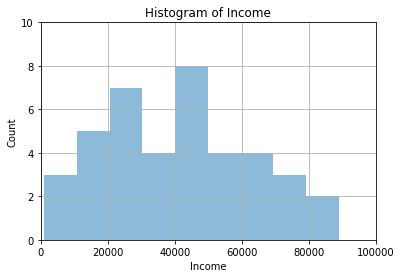

In [38]:
plt.hist(income, bins=9, alpha=0.5)
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Histogram of Income')
plt.axis([0, 100000, 0, 10])
plt.grid(True)
plt.show()

#### Let's cross-tabulate the Genre and the Gender attributes to find out if men and women have different movie preferences. [Note: correlation analysis perfromed earlier could also shed some light on this question.]

In [39]:
# First we need the counts for males and females across different genres
m_counts = [14, 6, 8]  # counts of Action, Comedy, Drama for male custs.
f_counts = [8, 6, 12]  # counts of Action, Comedy, Drama for female custs.
N = len(f_counts)

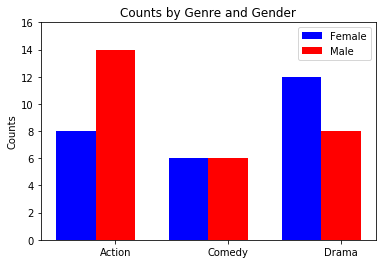

In [40]:
ind = np.arange(N)  # the x locations for the groups
ind = ind + 0.15
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, f_counts, width, color='b')
rects2 = ax.bar(ind+width, m_counts, width, color='r')

rects1 = plt.bar(ind, f_counts, width, color='b')
rects2 = plt.bar(ind+width, m_counts, width, color='r')


ax.set_ylabel('Counts')
ax.set_ybound(upper=16)
ax.set_title('Counts by Genre and Gender')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Action', 'Comedy', 'Drama') )

ax.legend( (rects1[0], rects2[0]), ('Female', 'Male') )

plt.show()

# plt.savefig("figure.pdf")

#### This figure shows that male customers tend to prefer action movies, while female customers tend to like dramas. 

#### Now, let's use a scatter plot discover possible correlations between Age and Income.

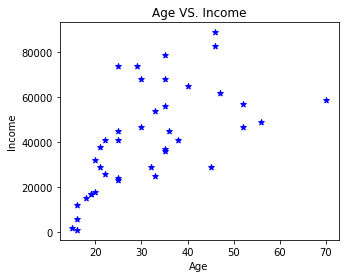

In [41]:
fig = plt.figure(figsize=(5, 4))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(age, income, color="blue", marker="*")
# Add a title.
ax.set_title("Age VS. Income")
# Add some axis labels.
ax.set_xlabel("Age")
ax.set_ylabel("Income")
# Produce an image.
# fig.savefig("scatterplot.png")
plt.show()

#### Indeed, there does appear to be a positive correlation between Age and Income. This can also be observed by viewing the Pearson r correlation coefficient in our correlation matrix shown earlier.